In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier        #run this
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


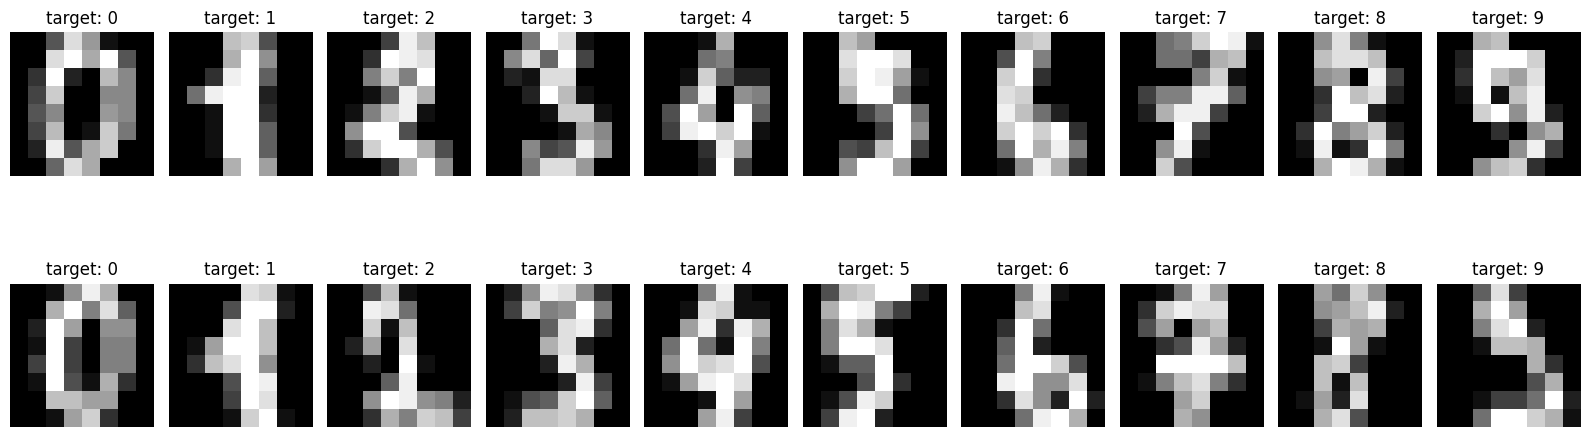

In [ ]:
mnist = load_digits()
type(mnist)
# mnist.keys()
# pd.DataFrame(mnist.data).head()
# pd.DataFrame(mnist.target).head()                                    #run this
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [ ]:
#loading the dataset manually and then splitting it

def fetch_data(test_size=10000, randomize=False, standardize=True):
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    if randomize:
        random_state = check_random_state(0)
        permutation = random_state.permutation(X.shape[0])
        X = X[permutation]
        y = y[permutation]                                                #run this
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False)
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test


if __name__ == '__main__':
    x_train, y_train, x_test, y_test = fetch_data()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Load the MNIST dataset  using keras
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
#-------------------------------------------------------------------------------------
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Define the parameter grid for Grid Search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(x_train_flat, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)                   #DONT RUN THIS

# Get the best KNN model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_knn_model.predict(x_test_flat)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print other evaluation metrics or visualize the results
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 3}
Accuracy: 0.9452


In [ ]:
# Load the MNIST dataset  using keras
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
#----------------------------------------------------------------


#________train KNN MODEL______________
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Create a KNN model                                             #RUN THIS
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(x_train_flat, y_train)

y_pred = knn_model.predict(x_test_flat)

print(accuracy_score(y_test, y_pred))
# plt.scatter(y_test, y_pred)
# plt.plot(x_test_flat, y_pred)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

0.9452


In [ ]:
#___MKAE A DIRECTORY TO STORE INPUT IMAGES_____
def mkdir(dirname):
    try:
        os.mkdir(dirname)                              #RUN THIS ONCE
        print('made', dirname)
    except FileExistsError:
        print(dirname, 'exists')

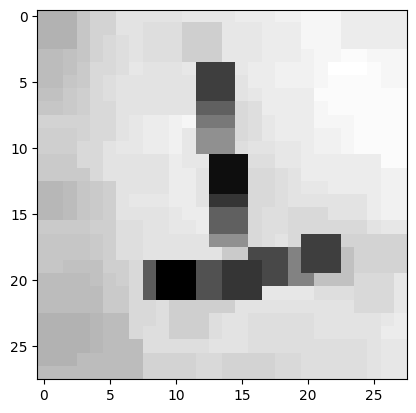

This is probably a 0


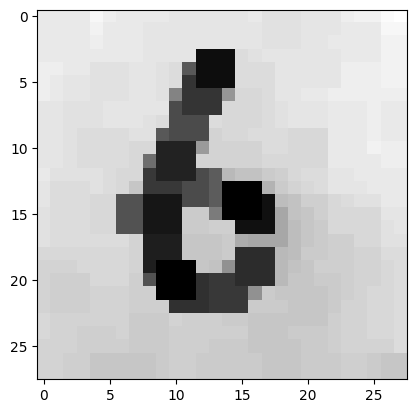

This is probably a 0


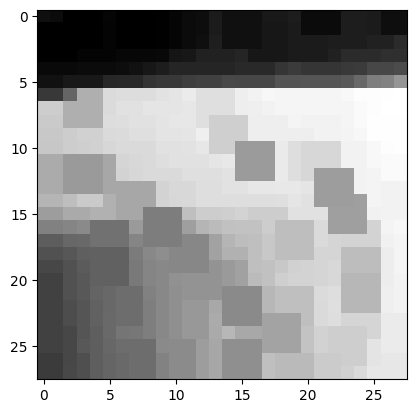

This is probably a 6


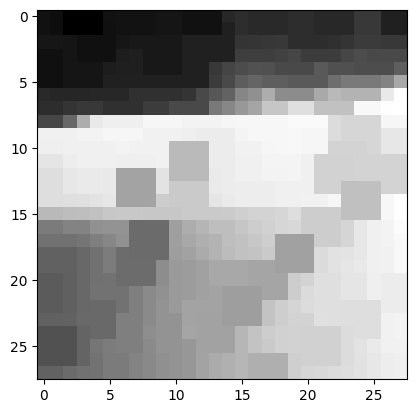

This is probably a 6


In [ ]:
#___MAIN___
mkdir('digits')
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:, :, 0]

        # Check if img is None (image not loaded successfully)
        if img is None:
            print(f"Error: Unable to load image {image_number}")
            image_number += 1
            continue                                                    #run this

        # Resize the image to match the expected size (28x28)
        img = cv2.resize(img, (28, 28))

        # Apply image dilation
        kernel = np.ones((3, 3), np.uint8)
        img = cv2.erode(img, kernel, iterations=1)

        img = np.invert(np.array([img]))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

        img_flat = img.flatten() / 255.0  # Flatten and normalize the image
        prediction = knn_model.predict([img_flat])
        print(f"This is probably a {prediction[0]}")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1